## Lecture 2a: Regression (Linear Methods)

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
# import sklearn.linear_model as slm (statsmodels gives more robust results)
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns #for nicer plots.
from patsy import dmatrices

### Data processing and exploration

In [45]:
data = pd.read_csv('housing.csv')

In [46]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [55]:
pd.unique(data.ocean_proximity) #Check unique values of categorical variable

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Create matrix plot of histograms and scatter plots. What do you observe?

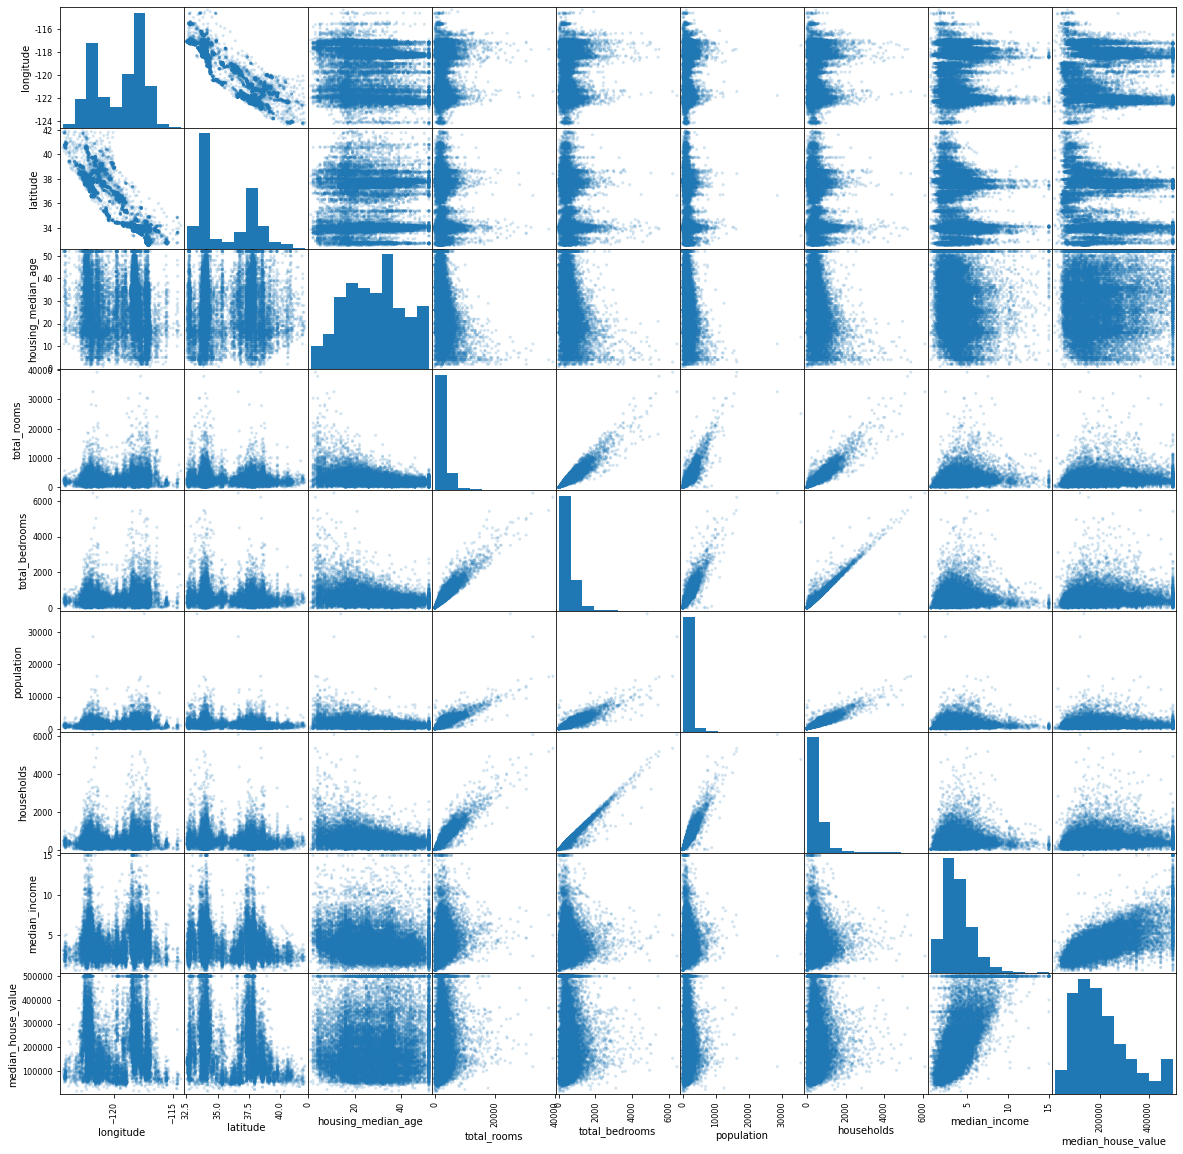

In [52]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20,20))
plt.show()

In [53]:
df = data.drop('ocean_proximity', axis = 1) # we can drop this for now

Check the number of complete observations and data type; remove missing observations; check again.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [13]:
df = df.dropna(axis = 0) # remove missing observations
df.info() #check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


Obtain correlation matrix

In [60]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Plot heatmap of matrix.

<AxesSubplot:>

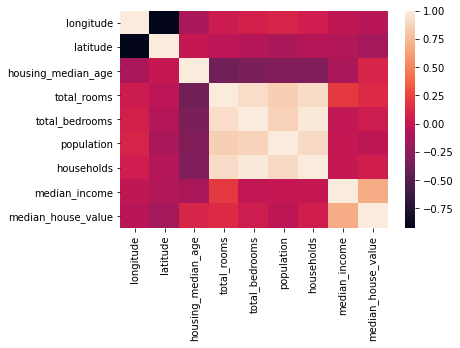

In [63]:
sns.heatmap(df.corr())

Create histogram of selected variable.

<AxesSubplot:>

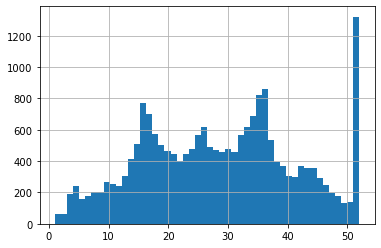

In [56]:
df['housing_median_age'].hist(bins=50) #single histogram

Create scatter plot of selected variable.

Text(0, 0.5, 'House Price')

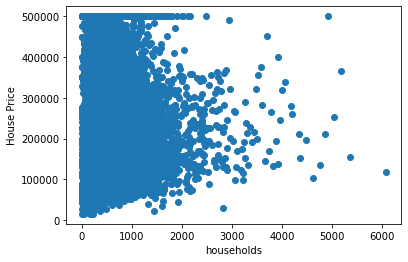

In [98]:
plt.scatter(df['households'], df['median_house_value'])
plt.xlabel('households')
plt.ylabel('House Price')

/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing_median_age'>

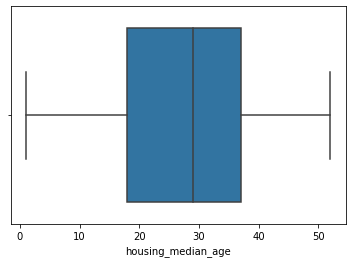

In [104]:
sns.boxplot(df['housing_median_age'])

### Linear model

First, split your dataset into a training set and a test/validation set. You can specify the proportion of the split, e.g. 20% test, or 25% test, etc.

In [59]:
df_train, df_test = train_test_split(df, test_size=0.25)

Fit a model with selected variables

In [91]:
model_equation = 'median_house_value ~ latitude + total_bedrooms + median_income + housing_median_age '
model = smf.ols(model_equation, df_train).fit()

Get model summary; consider the p-values of each coefficient (P>|t|), as well as R^2/adj. R^2,, etc.

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     4361.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:06:54   Log-Likelihood:            -1.9449e+05
No. Observations:               15314   AIC:                         3.890e+05
Df Residuals:                   15309   BIC:                         3.890e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.173e+05   1.12e+04     10.431      0.000    9.53e+04    1.39e+05
latitude           -4415.6431    301.674    -14.637      0.000   -5006.960   -3824.326
total_bedrooms        34.9650      1.614     21.663      0.000      31.801      38.129
median_income       4.308e+04    338.990    127.092      0.000    4.24e+04    4.37e+04
housing_median_age  2153.9427     53.997     39.890      0.000    2048.102    2259.783
==============================================================================
Omnibus:                     3078.694   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7136.024
Skew:                           1.139   Prob(JB):                         0.00
Kurtosis:                       5.449   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note: All the coefficients are statistically significant, but the low $R^2$ indicates that more variables are required to explain the median house value.

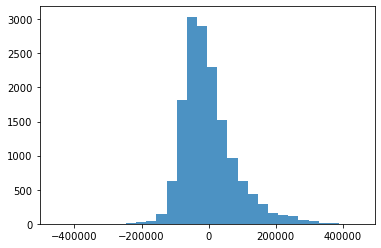

In [80]:
plt.hist(model.resid, bins=30, alpha =.8);

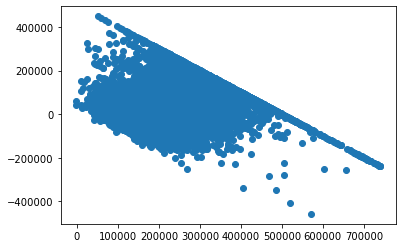

In [81]:
# Can help investigate irregularities in error structure
plt.scatter(model.fittedvalues, model.resid)

The strong linear dependence in the plot indicates there is a potential explanatory variable missing.

Now, let's predict with this model (using the test set).

In [92]:
#Get the X,y vectors using patsy
y_test, X_test = dmatrices(model_equation, df_test, return_type='dataframe')

In [93]:
predictions = model.get_prediction(X_test)
predictions.summary_frame() # get the predictions, errors and confidence intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,269724.208837,1461.790941,266858.924704,272589.492971,114180.513978,425267.903696
1,273904.742798,1101.220974,271746.218692,276063.266903,118372.461957,429437.023639
2,157706.200727,1090.991756,155567.727105,159844.674348,2174.196860,313238.204593
3,183697.079336,1597.285918,180566.208929,186827.949742,28148.265432,339245.893239
4,127155.769166,1217.665223,124769.000480,129542.537852,-28379.846761,282691.385094
...,...,...,...,...,...,...
5114,274196.304149,1492.306291,271271.206301,277121.401998,118651.495960,429741.112339
5115,165615.125305,1042.476421,163571.747511,167658.503100,10084.399884,321145.850726
5116,224720.548060,943.531857,222871.113381,226569.982738,69192.249780,380248.846340
5117,146342.598057,1295.021017,143804.202812,148880.993301,-9195.418543,301880.614656


Now, let's plot the predicted versus observed values in the test set.

(0.0, 500000.0)

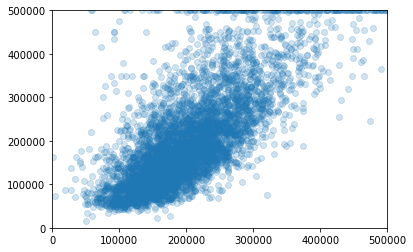

In [95]:
plt.scatter(predictions.summary_frame()['mean'], y_test.median_house_value, alpha=.2)
plt.xlim(0,500000)
plt.ylim(0,500000)
#plt.legend(['Actual','Predicted'])

Further references: https://www.statsmodels.org/stable/index.html

For R-style diagnostic plots, see: https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/